In [1]:
import pandas as pd
data = pd.read_csv("C:/Users/ASHISH YENKAR/Desktop/Topic-Modeling-main/data.csv",encoding = "ISO-8859-1")

#data = pd.read_csv("C:/Users/admin/Desktop/R_Language/assignment_completed/11)Test_mining/Hamspam.csv",encoding = "ISO-8859-1")

In [2]:
data.head()

,Statement,Link,Date,Source,Label
0,âNobody's ever seen a number like thisâ¦ (3...,https://www.politifact.com/factchecks/2020/oct...,ober 30^ 2020,Donald Trump,half-true
1,"Says President Donald Trump ""thinks that $15 a...",https://www.politifact.com/factchecks/2020/oct...,ober 30^ 2020,Joe Biden,half-true
2,âOn 60 Minutes^ Joe said he never met with H...,https://www.politifact.com/factchecks/2020/oct...,ober 30^ 2020,Viral image,false
3,Says YouTube removed Tucker Carlsonâs interv...,https://www.politifact.com/factchecks/2020/oct...,ober 30^ 2020,Facebook posts,false
4,Says Jeff Foxworthy wrote a âfence testâ f...,https://www.politifact.com/factchecks/2020/oct...,ober 30^ 2020,Facebook posts,false


In [3]:
data.isnull().sum()

Statement    0
Link         0
Date         0
 Source      0
 Label       1
dtype: int64

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Statement  31 non-null     object
 1   Link       31 non-null     object
 2   Date       31 non-null     object
 3    Source    31 non-null     object
 4    Label     30 non-null     object
dtypes: object(5)
memory usage: 1.3+ KB


# Data Cleaning

In [5]:
import re #regular expression
import string

def clean_text(text):
    '''Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub("[0-9" "]+"," ",text)
    text = re.sub('[‘’“”…]', '', text)
    return text

clean = lambda x: clean_text(x)


In [8]:
data['Statement'] = data.Statement.apply(clean)
data.Statement

0     ânobodys ever seen a number like thisâ¦  ec...
1     says president donald trump thinks that  an ho...
2     âon  minutes joe said he never met with hunt...
3     says youtube removed tucker carlsonâs interv...
4     says jeff foxworthy wrote a âfence testâ f...
5     âjoe biden calls pennsylvania voters who don...
6     says trump âdidnât campaign on cutting the...
7     âi can send every qualified person to a four...
8     âthe majority of minimum wage workersare mot...
9     says dan forest has âmissed almost half of t...
10    âmajor decision protecting voting rights in ...
11    a detroit tv station aired the election result...
12    âwhen asked about courtpacking bidens staff ...
13    says us rep ann wagner âvoted five times aga...
14    âi have been very clear with daca even in my...
15    says kamala harris said looters are just feedi...
16    says jill biden said âwhatever is on hunterâ...
17    my  election was the first time speaker ro

In [9]:
#Word frequency
freq = pd.Series(' '.join(data['Statement']).split()).value_counts()[:20] # for top 20
freq

the         13
says        11
a            8
to           7
of           7
for          6
in           6
and          6
have         6
is           5
with         5
joe          4
biden        4
that         4
election     4
on           4
he           3
trump        3
you          3
my           3
dtype: int64

In [11]:
#removing stopwords
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')
data['Statement'] = data['Statement'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

[nltk_data] Downloading package stopwords to C:\Users\ASHISH
[nltk_data]     YENKAR\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [14]:
#word frequency after removal of stopwords
freq_Sw = pd.Series(' '.join(data['Statement']).split()).value_counts()[:20] # for top 20
freq_Sw

says        11
biden        4
election     4
joe          4
said         3
ballots      3
trump        3
day          2
â¦          2
times        2
wage         2
called       2
donât      2
kamala       2
âthe       2
us           2
voting       2
health       2
âi         2
get          2
dtype: int64

In [15]:
# count vectoriser tells the frequency of a word.
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
vectorizer = CountVectorizer(min_df = 1, max_df = 0.9)
X = vectorizer.fit_transform(data["Statement"])
word_freq_df = pd.DataFrame({'term': vectorizer.get_feature_names(), 'occurrences':np.asarray(X.sum(axis=0)).ravel().tolist()})
word_freq_df['frequency'] = word_freq_df['occurrences']/np.sum(word_freq_df['occurrences'])
#print(word_freq_df.sort('occurrences',ascending = False).head())

In [16]:
word_freq_df.head(30)

,term,occurrences,frequency
0,act,1,0.003344
1,afford,1,0.003344
2,affordable,1,0.003344
3,ago,1,0.003344
4,aired,1,0.003344
5,alcoholâ,1,0.003344
6,almost,1,0.003344
7,ann,1,0.003344
8,asked,1,0.003344
9,ballot,1,0.003344


In [17]:
#TFIDF - Term frequency inverse Document Frequencyt
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english', max_features= 1000, max_df = 0.5, smooth_idf=True) #keep top 1000 words
doc_vec = vectorizer.fit_transform(data["Statement"])
names_features = vectorizer.get_feature_names()
dense = doc_vec.todense()
denselist = dense.tolist()
df = pd.DataFrame(denselist, columns = names_features)

In [18]:
df

,act,afford,affordable,ago,aired,alcoholâ,ann,asked,ballot,ballots,...,want,wants,week,weeks,workers,workersare,wrote,years,york,youtube
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.34229,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.370735
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.370735,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.466598,0.000000,0.000000,0.000000,0.000000
9,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000


# N-gram

In [19]:
#Bi-gram
def get_top_n2_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(2,2),  #for tri-gram, put ngram_range=(3,3)
            max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]

In [21]:
top2_words = get_top_n2_words(data["Statement"], n=200) #top 200
top2_df = pd.DataFrame(top2_words)
top2_df.columns=["Bi-gram", "Freq"]
top2_df.head()

,Bi-gram,Freq
0,joe biden,3
1,minimum wage,2
2,election day,2
3,kamala harris,2
4,nobodys ever,1


[Text(0, 0, 'joe biden'),
 Text(1, 0, 'minimum wage'),
 Text(2, 0, 'election day'),
 Text(3, 0, 'kamala harris'),
 Text(4, 0, 'nobodys ever'),
 Text(5, 0, 'ever seen'),
 Text(6, 0, 'seen number'),
 Text(7, 0, 'number like'),
 Text(8, 0, 'like thisâ'),
 Text(9, 0, 'thisâ economic'),
 Text(10, 0, 'economic growth'),
 Text(11, 0, 'growth four'),
 Text(12, 0, 'four times'),
 Text(13, 0, 'times greater'),
 Text(14, 0, 'greater experts'),
 Text(15, 0, 'experts expectedâ'),
 Text(16, 0, 'says president'),
 Text(17, 0, 'president donald'),
 Text(18, 0, 'donald trump'),
 Text(19, 0, 'trump thinks')]

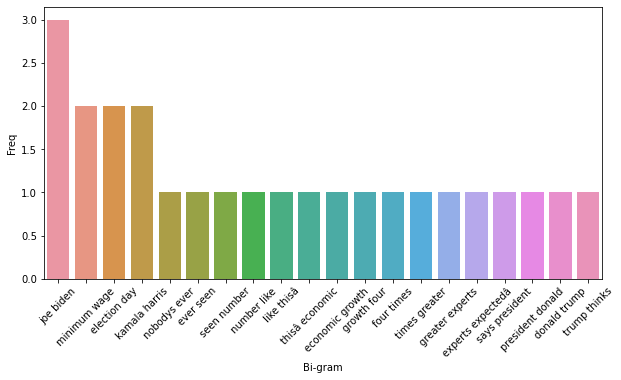

In [22]:
#Bi-gram plot
import matplotlib.pyplot as plt
import seaborn as sns
top20_bigram = top2_df.iloc[0:20,:]
fig = plt.figure(figsize = (10, 5))
plot=sns.barplot(x=top20_bigram["Bi-gram"],y=top20_bigram["Freq"])
plot.set_xticklabels(rotation=45,labels = top20_bigram["Bi-gram"])

In [23]:
#Tri-gram
def get_top_n3_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(3,3), 
           max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]


In [24]:
top3_words = get_top_n3_words(data["Statement"], n=200)
top3_df = pd.DataFrame(top3_words)
top3_df.columns=["Tri-gram", "Freq"]

In [25]:
top3_df

,Tri-gram,Freq
0,nobodys ever seen,1
1,ever seen number,1
2,seen number like,1
3,number like thisâ,1
4,like thisâ economic,1
...,...,...
195,drivers get guaranteed,1
196,get guaranteed earnings,1
197,guaranteed earnings health,1
198,earnings health care,1


[Text(0, 0, 'nobodys ever seen'),
 Text(1, 0, 'ever seen number'),
 Text(2, 0, 'seen number like'),
 Text(3, 0, 'number like thisâ'),
 Text(4, 0, 'like thisâ economic'),
 Text(5, 0, 'thisâ economic growth'),
 Text(6, 0, 'economic growth four'),
 Text(7, 0, 'growth four times'),
 Text(8, 0, 'four times greater'),
 Text(9, 0, 'times greater experts'),
 Text(10, 0, 'greater experts expectedâ'),
 Text(11, 0, 'says president donald'),
 Text(12, 0, 'president donald trump'),
 Text(13, 0, 'donald trump thinks'),
 Text(14, 0, 'trump thinks hour'),
 Text(15, 0, 'thinks hour minimum'),
 Text(16, 0, 'hour minimum wage'),
 Text(17, 0, 'minimum wage much'),
 Text(18, 0, 'wage much essential'),
 Text(19, 0, 'much essential workers')]

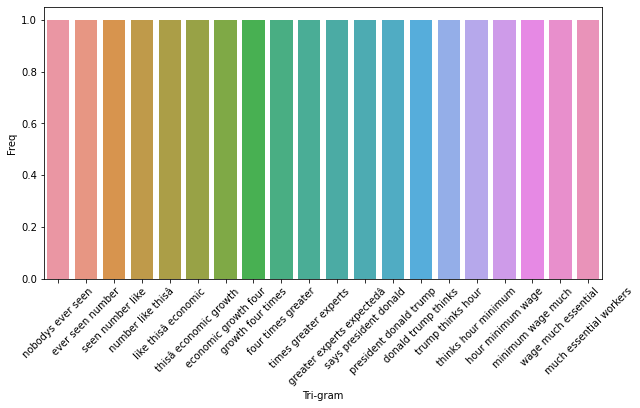

In [26]:
#Tri-gram plot
import seaborn as sns
top20_trigram = top3_df.iloc[0:20,:]
fig = plt.figure(figsize = (10, 5))
plot=sns.barplot(x=top20_trigram["Tri-gram"],y=top20_trigram["Freq"])
plot.set_xticklabels(rotation=45,labels = top20_trigram["Tri-gram"])

In [27]:
import spacy # language models
!python -m spacy download en_core_web_md


[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_md')


# WordCloud

In [28]:
string_Total = " ".join(data["Statement"])

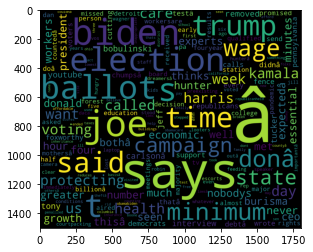

In [29]:
#wordcloud for entire corpus
!pip install wordcloud
import wordcloud
from wordcloud import WordCloud
wordcloud_stw = WordCloud(
                background_color= 'black',
                width = 1800,
                height = 1500
                ).generate(string_Total)
plt.imshow(wordcloud_stw)

# Applying naive bayes for classification

In [33]:
data.head()

,type,text
0,ham,hope good week checking
1,ham,kgive back thanks
2,ham,also cbe pay
3,spam,complimentary star ibiza holiday å£ cash needs...
4,spam,okmail dear dave final notice collect tenerife...


In [34]:
def split_into_words(i):
    return (i.split(" "))


In [35]:
from sklearn.model_selection import train_test_split

email_train,email_test = train_test_split(data,test_size=0.3)

In [36]:
email_test

,type,text
3120,ham,love aathilove u lot
412,ham,call cost guess isnt bad miss ya need ya want ...
4811,ham,yes glad made
1849,spam,check choose babe videos smsshsexnetun fgkslpo...
3008,ham,ok another number
...,...,...
2011,ham,yar quite clever aft many guesses lor got ask ...
929,ham,aight text address
4862,ham,hey babe u doin wot u love annie x
3829,ham,well like actually called someone punto woulda...


In [37]:
# Preparing email texts into word count matrix format 
emails_bow = CountVectorizer(analyzer=split_into_words).fit(data.text)

# ["mailing","body","texting"]
# ["mailing","awesome","good"]

# ["mailing","body","texting","good","awesome"]



#        "mailing" "body" "texting" "good" "awesome"
#  0          1        1       1        0       0
 
#  1          1        0        0       1       1    



In [38]:
# For all messages
all_emails_matrix = emails_bow.transform(data.text)
all_emails_matrix.shape 

(5559, 8175)

In [39]:
# For training messages
train_emails_matrix = emails_bow.transform(email_train.text)
train_emails_matrix.shape # (3891,8175)

# For testing messages
test_emails_matrix = emails_bow.transform(email_test.text)
test_emails_matrix.shape # (1668,8175)

(1668, 8175)

In [40]:
####### Without TFIDF matrices ########################
# Preparing a naive bayes model on training data set 

from sklearn.naive_bayes import MultinomialNB as MB
from sklearn.naive_bayes import GaussianNB as GB

# Multinomial Naive Bayes
classifier_mb = MB()
classifier_mb.fit(train_emails_matrix,email_train.type)
train_pred_m = classifier_mb.predict(train_emails_matrix)
accuracy_train_m = np.mean(train_pred_m==email_train.type) # 98%

test_pred_m = classifier_mb.predict(test_emails_matrix)
accuracy_test_m = np.mean(test_pred_m==email_test.type) # 96%



In [41]:
# Gaussian Naive Bayes 
classifier_gb = GB()
classifier_gb.fit(train_emails_matrix.toarray(),email_train.type.values) # we need to convert tfidf into array format which is compatible for gaussian naive bayes
train_pred_g = classifier_gb.predict(train_emails_matrix.toarray())
accuracy_train_g = np.mean(train_pred_g==email_train.type) # 95%

test_pred_g = classifier_gb.predict(test_emails_matrix.toarray())
accuracy_test_g = np.mean(test_pred_g==email_test.type) # 8%

# Using TFIDF

In [42]:
from sklearn.feature_extraction.text import TfidfTransformer

# Learning Term weighting and normalizing on entire emails
tfidf_transformer = TfidfTransformer().fit(all_emails_matrix)

# Preparing TFIDF for train emails
train_tfidf = tfidf_transformer.transform(train_emails_matrix)

train_tfidf.shape # (3891, 6661)

# Preparing TFIDF for test emails
test_tfidf = tfidf_transformer.transform(test_emails_matrix)

test_tfidf.shape #  (1668, 6661)



(1668, 8175)

In [43]:
# Preparing a naive bayes model on training data set 

from sklearn.naive_bayes import MultinomialNB as MB
from sklearn.naive_bayes import GaussianNB as GB

# Multinomial Naive Bayes
classifier_mb = MB()
classifier_mb.fit(train_tfidf,email_train.type)
train_pred_m = classifier_mb.predict(train_tfidf)
accuracy_train_m = np.mean(train_pred_m==email_train.type) # 96%

test_pred_m = classifier_mb.predict(test_tfidf)
accuracy_test_m = np.mean(test_pred_m==email_test.type) # 96%

 


In [44]:
accuracy_train_m

0.9707016191210486

In [45]:
# Gaussian Naive Bayes 
classifier_gb = GB()
classifier_gb.fit(train_tfidf.toarray(),email_train.type.values) # we need to convert tfidf into array format which is compatible for gaussian naive bayes
train_pred_g = classifier_gb.predict(train_tfidf.toarray())
accuracy_train_g = np.mean(train_pred_g==email_train.type) # 95%
test_pred_g = classifier_gb.predict(test_tfidf.toarray())
accuracy_test_g = np.mean(test_pred_g==email_test.type) # 88%

# inplace of tfidf we can also use train_emails_matrix and test_emails_matrix instead of term inverse document frequency matrix

In [46]:
accuracy_test_g

0.8884892086330936